# Hands-on tutorial on Convnets with Keras
Adapted from assignments 2 and 3 of CS231N: 

http://cs231n.github.io/assignment2/

http://cs231n.github.io/assignment3/

Pre-requisites:

CS231N:
http://cs231n.github.io/neural-networks-3

http://cs231n.github.io/convolutional-networks/




Python 2.7: https://www.codecademy.com/tracks/python

Numpy: https://www.reddit.com/r/Python/comments/1wwwss/100_numpy_exercises/

Keras: http://keras.io/
 

Install Keras and dependencies, and download assigment 2: http://vision.stanford.edu/teaching/cs231n/assignment2.zip


In [74]:


%matplotlib inline

import numpy as np
from sklearn.preprocessing import StandardScaler  

from matplotlib import pyplot as plt

from cs231n.data_utils import load_CIFAR_batch

from keras.utils import np_utils

from __future__ import absolute_import
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.utils import np_utils, generic_utils


from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

from keras.regularizers import l2, activity_l2



import theano.tensor.signal.conv 
from theano.tensor.signal import downsample

# Load the data
Load up part of CIFAR-10 data, so we can use it to train a classifier.

In [75]:

cifar10_batch_1 = 'cs231n/datasets/cifar-10-batches-py/data_batch_1'
X_train, y_train = load_CIFAR_batch(cifar10_batch_1)
    
    

# Visualize some images


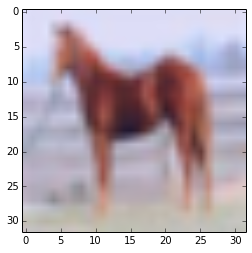

In [203]:
img = 255- X_train[np.random.randint(3000)] 

plt.imshow(img)

# Pre-process data


In [3]:
X_train, y_train = X_train[:3000], y_train[:3000] #smaller dataset to speed-up experimentation

In [4]:
X_train = np.transpose(X_train, (0, 3, 1,2)) #to fit with neural net input layer

In [5]:
def preprocess_data(X, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

In [6]:
X_train, scaler = preprocess_data(X_train)
Y_train = np_utils.to_categorical(y_train)


In [7]:
X_train.shape #check the input shape

(3000, 3, 32, 32)

# Train a ConvNet!

The architecture is conv-relu-pool-Dense-softmax, where the conv layer uses stride-1 "same" convolutions to preserve the input size; the pool layer uses non-overlapping
  2x2 pooling regions.

In [8]:
# number of convolutional filters to use at each layer
nb_filters = 32
# level of pooling to perform at each layer (POOL x POOL)
nb_pool = 2
# level of convolution to perform at each layer (CONV x CONV)
nb_conv =  3
# the CIFAR10 images are RGB
image_dimensions = 3

#suggested parameters:
# nb_epoch=30, batch_size=10, validation_split=0.33333
# lr=0.0001, decay=1e-6, momentum=0.9


In [9]:
#Indication: https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

#To keep track of training, use callbacks: see https://groups.google.com/forum/#!topic/keras-users/XK_a5r1vhZQ 

##Your code here##

model = Sequential()

model.add(Convolution2D(nb_filters, image_dimensions, nb_conv, nb_conv, border_mode='full'))
model.add(Activation('relu'))
model.add(MaxPooling2D(poolsize=(nb_pool, nb_pool)))

model.add(Flatten())
# the image dimensions are the original dimensions divided by any pooling
# each pixel has a number of filters, determined by the last Convolution2D layer
model.add(Dense(9248, 10))

model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [10]:
from keras.callbacks import History
history = History()
model.fit(X_train, Y_train, nb_epoch=30, batch_size=20, show_accuracy=True, validation_split=0.3333, verbose=2, callbacks=[history])

Train on 2000 samples, validate on 1000 samples
Epoch 0
14s - loss: 2.2595 - acc: 0.2195 - val_loss: 2.0839 - val_acc: 0.2530
Epoch 1
15s - loss: 1.9444 - acc: 0.3085 - val_loss: 1.9342 - val_acc: 0.3220
Epoch 2
15s - loss: 1.8038 - acc: 0.3640 - val_loss: 1.8861 - val_acc: 0.3490
Epoch 3
13s - loss: 1.7154 - acc: 0.4000 - val_loss: 1.8736 - val_acc: 0.3450
Epoch 4
13s - loss: 1.6345 - acc: 0.4385 - val_loss: 1.8337 - val_acc: 0.3660
Epoch 5
13s - loss: 1.5747 - acc: 0.4620 - val_loss: 1.8293 - val_acc: 0.3630
Epoch 6
13s - loss: 1.5250 - acc: 0.4780 - val_loss: 1.7930 - val_acc: 0.3830
Epoch 7
13s - loss: 1.4757 - acc: 0.4965 - val_loss: 1.8071 - val_acc: 0.3760
Epoch 8
14s - loss: 1.4349 - acc: 0.5145 - val_loss: 1.7768 - val_acc: 0.3900
Epoch 9
15s - loss: 1.4007 - acc: 0.5280 - val_loss: 1.7595 - val_acc: 0.3930
Epoch 10
14s - loss: 1.3549 - acc: 0.5450 - val_loss: 1.7691 - val_acc: 0.4060
Epoch 11
13s - loss: 1.3280 - acc: 0.5645 - val_loss: 1.7501 - val_acc: 0.3980
Epoch 12
13s -

Plot the loss training/validation curves, and the accuracy  training/validation curves, using the history.history dictionary. It should show clear overfitting:

In [11]:
#Suggestion: plot with pandas and ggplot

##Your code here ##

import pandas

df=pandas.DataFrame.from_dict(history.history)

In [12]:
df['epoch']=range(len(df))

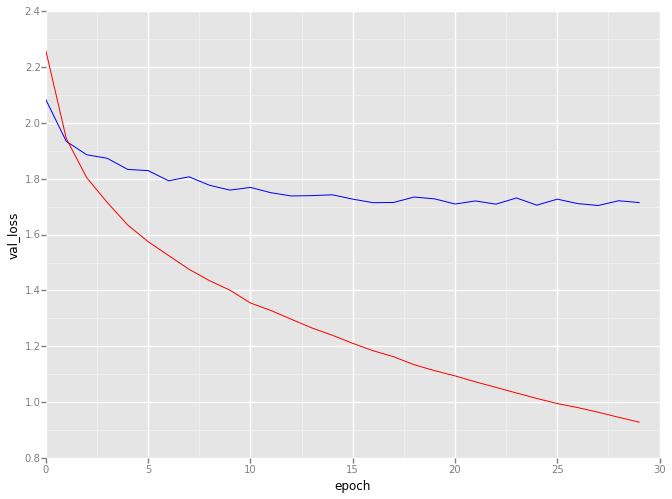

<ggplot: (8775477847029)>

In [13]:
from ggplot import *

ggplot(aes(x='epoch', y='val_loss' ), data=df) +\
geom_line(color='blue')     +\
geom_line(aes(x='epoch', y='loss' ), data=df, color='red') 


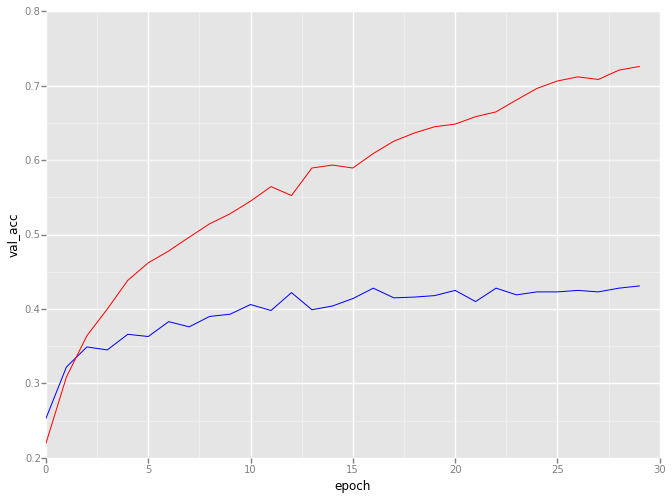

<ggplot: (8775472561273)>

In [14]:

ggplot(aes(x='epoch', y='val_acc' ), data=df) +\
geom_line(color='blue')     +\
geom_line(aes(x='epoch', y='acc' ), data=df, color='red') 




# Dropout
To reduce overfitting, we can use dropout. Add dropout to your model, and see what happens! 

In [15]:
## Your code here ##


model = Sequential()

model.add(Convolution2D(nb_filters, image_dimensions, nb_conv, nb_conv, border_mode='full'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(MaxPooling2D(poolsize=(nb_pool, nb_pool)))
model.add(Dropout(0.5))


model.add(Flatten())
# the image dimensions are the original dimensions divided by any pooling
# each pixel has a number of filters, determined by the last Convolution2D layer
model.add(Dense(9248, 10))

model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [33]:

from keras.callbacks import History

history = History()
result = model.fit(X_train, Y_train, nb_epoch=30, batch_size=20, show_accuracy=True, validation_split=0.3333, verbose=2, callbacks=[history])




Train on 2000 samples, validate on 1000 samples
Epoch 0
19s - loss: 2.3159 - acc: 0.1580 - val_loss: 2.1345 - val_acc: 0.2410
Epoch 1
18s - loss: 2.1281 - acc: 0.2370 - val_loss: 2.0677 - val_acc: 0.2940
Epoch 2
19s - loss: 2.0281 - acc: 0.2690 - val_loss: 2.0203 - val_acc: 0.3270
Epoch 3
17s - loss: 1.9602 - acc: 0.3080 - val_loss: 1.9919 - val_acc: 0.3440
Epoch 4
17s - loss: 1.8972 - acc: 0.3220 - val_loss: 1.9693 - val_acc: 0.3460
Epoch 5
19s - loss: 1.8643 - acc: 0.3335 - val_loss: 1.9508 - val_acc: 0.3660
Epoch 6
19s - loss: 1.8012 - acc: 0.3840 - val_loss: 1.9302 - val_acc: 0.3750
Epoch 7
21s - loss: 1.7821 - acc: 0.3750 - val_loss: 1.9153 - val_acc: 0.3810
Epoch 8
19s - loss: 1.7581 - acc: 0.3870 - val_loss: 1.9067 - val_acc: 0.3830
Epoch 9
25s - loss: 1.7246 - acc: 0.3895 - val_loss: 1.8954 - val_acc: 0.3820
Epoch 10
22s - loss: 1.7271 - acc: 0.4015 - val_loss: 1.8843 - val_acc: 0.3950
Epoch 11
18s - loss: 1.6901 - acc: 0.4225 - val_loss: 1.8772 - val_acc: 0.3960
Epoch 12
20s -

Plot the loss training/validation curves, and the accuracy  training/validation curves.

In [34]:
import pandas

df4=pandas.DataFrame.from_dict(history.history)
df4['epoch']=range(len(df4))

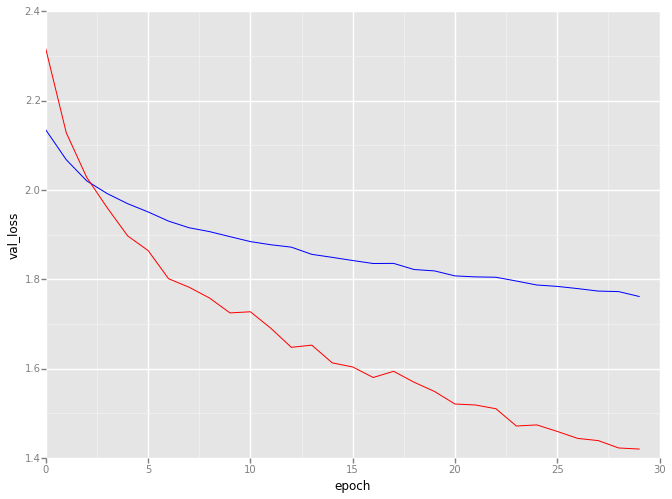

<ggplot: (8754421387617)>

In [35]:
from ggplot import *


ggplot(aes(x='epoch', y='val_loss' ), data=df4) +\
geom_line(color='blue')     +\
geom_line(aes(x='epoch', y='loss' ), data=df4, color='red') 


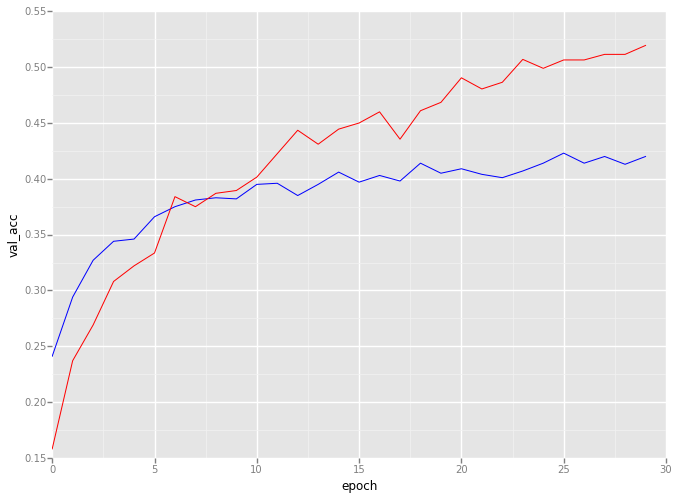

<ggplot: (8754421236517)>

In [36]:

ggplot(aes(x='epoch', y='val_acc' ), data=df4) +\
geom_line(color='blue')     +\
geom_line(aes(x='epoch', y='acc' ), data=df4, color='red') 



Are you satisfied by the improvement? Comment your result:

 (your comment here)



#Data Augmentation


Another way to reduce overfitting is to implement data augmentation. Since we have very little training data, we will use what little training data we have to generate artificial data, and use this artificial data to train our network.


In [54]:
## Re-initialize your model (by re-running the cell in which it is defined)
model = Sequential()

model.add(Convolution2D(nb_filters, image_dimensions, nb_conv, nb_conv, border_mode='full'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(MaxPooling2D(poolsize=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
# the image dimensions are the original dimensions divided by any pooling
# each pixel has a number of filters, determined by the last Convolution2D layer
model.add(Dense(9248, 10))

model.add(Activation('softmax'))

# let's train the model using SGD + momentum (how original).
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

This time, we need to do the train/validation data split manually 

In [55]:
def split_data(X_train,y_train, num_training=2000):
    num_validation= len(X_train)- num_training
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    return X_train, y_train, X_val, y_val

In [56]:

X_train, Y_train, X_val, Y_val= split_data(X_train,Y_train)


In [57]:
#see http://keras.io/preprocessing/image/

import keras

datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=True,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=True,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

In [58]:
#Indication: https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
# You will need to modify this code in order to plot loss and accuracy curves.

## Your code here ##

nb_epoch=30

loss=[]
acc=[] 
val_loss=[]
val_acc=[] 

for e in range(nb_epoch):
    print('-'*40)
    print('Epoch', e)
    print('-'*40)
    print("Training...")
        # batch train with realtime data augmentation
        
        #batch/epoch/iteration differences: http://stats.stackexchange.com/a/164875/82565
    progbar = generic_utils.Progbar(X_train.shape[0])
    
    
    for X_batch, Y_batch in datagen.flow(X_train, Y_train, batch_size=20):
            
                  
        loss_acc = model.train_on_batch(X_batch, Y_batch,accuracy=True)
        progbar.add(X_batch.shape[0], values=[("train loss", loss_acc[0]),("train acc", loss_acc[1])])
     
    
    print('computing training and validation loss/acc')
   
    (loss_epoch, acc_epoch) = model.evaluate(X_train, Y_train, batch_size=20, show_accuracy=True, verbose=2)
      
    
    (val_loss_epoch, val_acc_epoch) = model.evaluate(X_val, Y_val, batch_size=20, show_accuracy=True, verbose=2)
           
    
    loss.append(loss_epoch)
    acc.append(acc_epoch)
 
    val_loss.append(val_loss_epoch)
    val_acc.append(val_acc_epoch)
    
    print('-'*40)
    print('training accuracy:', float(acc_epoch)), print('validation accuracy:', float(val_acc_epoch))
    print('-'*40)

            

----------------------------------------
Epoch 0
----------------------------------------
Training...
2000/2000 [==============================] - 22s - train loss: 2.2952 - train acc: 0.2015    
computing training and validation loss/acc
----------------------------------------
training accuracy: 0.2485
validation accuracy: 0.233
----------------------------------------
----------------------------------------
Epoch 1
----------------------------------------
Training...
2000/2000 [==============================] - 21s - train loss: 2.0475 - train acc: 0.2815    
computing training and validation loss/acc
----------------------------------------
training accuracy: 0.3055
validation accuracy: 0.278
----------------------------------------
----------------------------------------
Epoch 2
----------------------------------------
Training...
2000/2000 [==============================] - 22s - train loss: 1.9467 - train acc: 0.3140    
computing training and validation loss/acc
-------------

In [59]:
import pandas
history={'loss':loss, 'acc':acc, 'val_acc':val_acc, 'val_loss':val_loss }

dfaugment=pandas.DataFrame.from_dict(history)
dfaugment['epoch']=range(len(dfaugment))

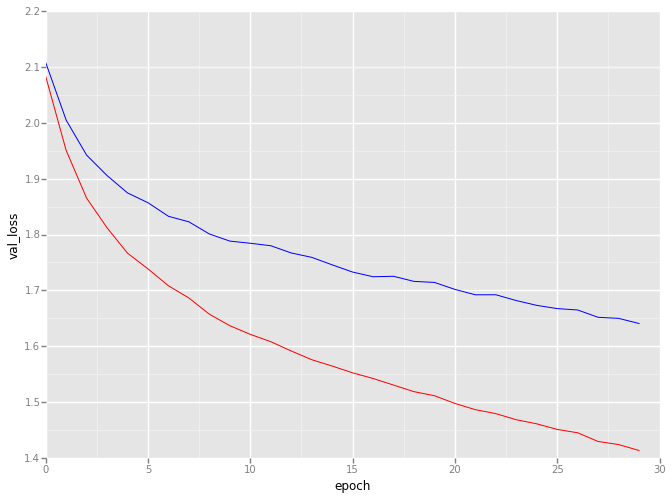

<ggplot: (8754410693605)>

In [60]:
from ggplot import *


ggplot(aes(x='epoch', y='val_loss' ), data=dfaugment) +\
geom_line(color='blue')     +\
geom_line(aes(x='epoch', y='loss' ), data=dfaugment, color='red') 


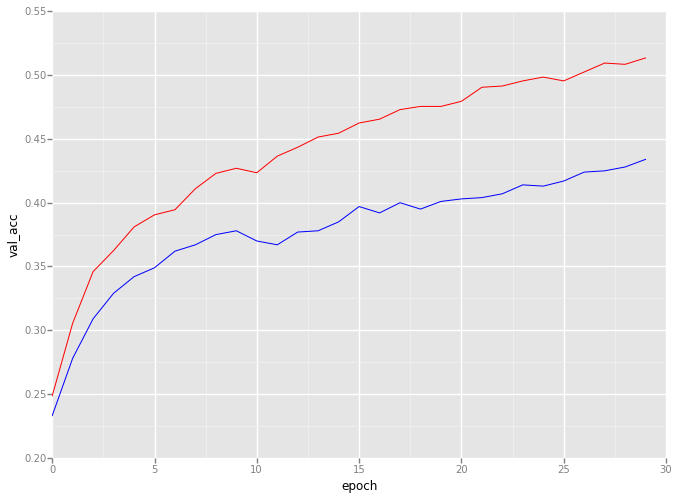

<ggplot: (8754426664285)>

In [61]:

ggplot(aes(x='epoch', y='val_acc' ), data=dfaugment) +\
geom_line(color='blue')     +\
geom_line(aes(x='epoch', y='acc' ), data=dfaugment, color='red') 



Are you satisfied by the improvement? Comment your result:

 (your comment here)



#Hyper-parameter optimization with Hyperopt


Intro: http://blog.dato.com/how-to-evaluate-machine-learning-models-part-4-hyperparameter-tuning

We try hyperopt: http://hyperopt.github.io/hyperopt/

http://fastml.com/optimizing-hyperparams-with-hyperopt/





Here, we optimize the learning rate, dropout, decay rate, batch size.

In [31]:
#Installation in Linux

#sudo pip install pymongo
#sudo pip install hyperopt

In [54]:
from keras.callbacks import History
history = History()

def modelscore(lrate=0.0001, batch_size=20,  dropout=0.5, decay=1e-6, nb_epoch=5):
    model = Sequential()
    model.add(Convolution2D(nb_filters, image_dimensions, nb_conv, nb_conv, border_mode='full'))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))

    model.add(MaxPooling2D(poolsize=(nb_pool, nb_pool)))
    model.add(Dropout(dropout))


    model.add(Flatten())
    # the image dimensions are the original dimensions divided by any pooling
    # each pixel has a number of filters, determined by the last Convolution2D layer
    model.add(Dense(9248, 10))

    model.add(Activation('softmax'))

    # let's train the model using SGD + momentum (how original).
    sgd = SGD(lrate=lrate, decay=decay, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd)

    model.fit(X_train, Y_train, nb_epoch=nb_epoch, batch_size=20, show_accuracy=True, validation_split=0.3333, verbose=2,  callbacks=[history])
    
    score= history.history['val_loss'][-1]
    
    return float(score)
    
 #   return {'loss': float(score), 'status': STATUS_OK}

In [55]:
import hyperopt
from hyperopt import hp
from hyperopt import fmin, tpe, hp, rand

Random search

In [56]:
## Your code here ##

space = (
             hp.loguniform('lrate', 1e-6, 1),
             hp.choice("batch_size", [8, 32, 64, 128]),
             hp.choice('dropout', [0.2,0.5,0.7]),
             hp.loguniform('decay', 1e-8, 1e-1)
         )

best = fmin(modelscore, space, algo=rand.suggest, max_evals=5) #in practice max_evals=50-100
print(best)
randomopt=hyperopt.space_eval(space, best)
    

Train on 2000 samples, validate on 1000 samples
Epoch 0
19s - loss: 1.9840 - acc: 0.3110 - val_loss: 1.8283 - val_acc: 0.3840
Epoch 1
18s - loss: 1.4946 - acc: 0.4690 - val_loss: 1.6901 - val_acc: 0.4000
Epoch 2
18s - loss: 1.3067 - acc: 0.5440 - val_loss: 1.6329 - val_acc: 0.4380
Epoch 3
18s - loss: 1.1798 - acc: 0.5885 - val_loss: 1.6103 - val_acc: 0.4560
Epoch 4
18s - loss: 1.0769 - acc: 0.6270 - val_loss: 1.5769 - val_acc: 0.4450
Train on 2000 samples, validate on 1000 samples
Epoch 0
18s - loss: 2.0047 - acc: 0.3035 - val_loss: 1.8252 - val_acc: 0.3820
Epoch 1
17s - loss: 1.5121 - acc: 0.4740 - val_loss: 1.6696 - val_acc: 0.4500
Epoch 2
18s - loss: 1.3032 - acc: 0.5490 - val_loss: 1.6258 - val_acc: 0.4260
Epoch 3
17s - loss: 1.1698 - acc: 0.5900 - val_loss: 1.5934 - val_acc: 0.4490
Epoch 4
18s - loss: 1.0243 - acc: 0.6555 - val_loss: 1.5948 - val_acc: 0.4530
Train on 2000 samples, validate on 1000 samples
Epoch 0
17s - loss: 1.9880 - acc: 0.3095 - val_loss: 1.7998 - val_acc: 0.389

In [64]:
(lrate,batch_size,dropout,decay)= hyperopt.space_eval(space, best)

modelscore(lrate=lrate, batch_size=int(batch_size),  dropout=dropout, decay=decay, nb_epoch=5)

Train on 2000 samples, validate on 1000 samples
Epoch 0
17s - loss: 2.2613 - acc: 0.1790 - val_loss: 2.2042 - val_acc: 0.2520
Epoch 1
17s - loss: 2.1609 - acc: 0.2150 - val_loss: 2.1956 - val_acc: 0.2700
Epoch 2
19s - loss: 2.1579 - acc: 0.2215 - val_loss: 2.1911 - val_acc: 0.2780
Epoch 3
19s - loss: 2.1564 - acc: 0.2170 - val_loss: 2.1880 - val_acc: 0.2820
Epoch 4
18s - loss: 2.1425 - acc: 0.2350 - val_loss: 2.1856 - val_acc: 0.2810


2.1856165037752255

"Smart" search (TPE)

In [65]:
## Your code here ##


space = (           
             hp.loguniform('lrate', 1e-6, 1),
             hp.choice("batch_size", [8, 32, 64, 128]),
             hp.choice('dropout', [0.2,0.5,0.7]),
             hp.loguniform('decay', 1e-8, 1e-1)
         )

best = fmin(modelscore, space, algo=tpe.suggest, max_evals=5)
print(best)
tpeopt=hyperopt.space_eval(space, best)
    

Train on 2000 samples, validate on 1000 samples
Epoch 0
19s - loss: 1.9976 - acc: 0.3000 - val_loss: 1.8488 - val_acc: 0.3750
Epoch 1
18s - loss: 1.5430 - acc: 0.4665 - val_loss: 1.6992 - val_acc: 0.4230
Epoch 2
19s - loss: 1.3575 - acc: 0.5330 - val_loss: 1.6122 - val_acc: 0.4590
Epoch 3
21s - loss: 1.1965 - acc: 0.5795 - val_loss: 1.6087 - val_acc: 0.4390
Epoch 4
19s - loss: 1.0807 - acc: 0.6240 - val_loss: 1.5746 - val_acc: 0.4620
Train on 2000 samples, validate on 1000 samples
Epoch 0
20s - loss: 1.9741 - acc: 0.3210 - val_loss: 1.7622 - val_acc: 0.4180
Epoch 1
19s - loss: 1.4953 - acc: 0.4750 - val_loss: 1.6736 - val_acc: 0.4340
Epoch 2
19s - loss: 1.2918 - acc: 0.5560 - val_loss: 1.6387 - val_acc: 0.4500
Epoch 3
19s - loss: 1.1453 - acc: 0.5940 - val_loss: 1.5677 - val_acc: 0.4790
Epoch 4
19s - loss: 1.0329 - acc: 0.6380 - val_loss: 1.5875 - val_acc: 0.4410
Train on 2000 samples, validate on 1000 samples
Epoch 0
20s - loss: 2.0204 - acc: 0.3075 - val_loss: 1.8279 - val_acc: 0.383

In [66]:
(lrate,batch_size,dropout,decay)= hyperopt.space_eval(space, best)

modelscore(lrate=lrate, batch_size=int(batch_size),  dropout=dropout, decay=decay, nb_epoch=5)

Train on 2000 samples, validate on 1000 samples
Epoch 0
19s - loss: 2.2174 - acc: 0.2045 - val_loss: 2.1957 - val_acc: 0.2480
Epoch 1
18s - loss: 2.1639 - acc: 0.2165 - val_loss: 2.1884 - val_acc: 0.2720
Epoch 2
18s - loss: 2.1324 - acc: 0.2125 - val_loss: 2.1841 - val_acc: 0.2780
Epoch 3
17s - loss: 2.1376 - acc: 0.2395 - val_loss: 2.1813 - val_acc: 0.2750
Epoch 4
17s - loss: 2.1020 - acc: 0.2490 - val_loss: 2.1793 - val_acc: 0.2760


2.179271474329394

### Other things you can try:
- Filter size: smaller filters may be more efficient
- Number of filters: Above we used 32 filters. Do more or fewer do better?
- Network depth: The network above has two layers of trainable parameters. Can you do better with a deeper network? You can implement alternative architectures. Some good architectures to try include:
    - [conv-relu-pool]xN - conv - relu - [affine]xM - [softmax or SVM]
    - [conv-relu-pool]XN - [affine]XM - [softmax or SVM]
    - [conv-relu-conv-relu-pool]xN - [affine]xM - [softmax or SVM]


You should tune the learning rate and regularization strength. When doing this there are a couple important things to keep in mind:

- If the parameters are working well, you should see improvement within a few hundred iterations
- Remember the coarse-to-fine approach for hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all.
- Once you have found some sets of parameters that seem to work, search more finely around these parameters. You may need to train for more epochs.

### Going above and beyond
If you are feeling adventurous there are many other features you can implement to try and improve your performance.

- Alternative update steps: For the assignment we implemented SGD+momentum and RMSprop; you could try alternatives like AdaGrad or AdaDelta.
- Other forms of regularization such as L1 or L2
- Alternative activation functions such as leaky ReLU or maxout
- Model ensembles



Have fun and happy training!

# transfer learning